In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

%matplotlib inline

In [2]:
df = pd.read_csv("C:/Users/14073/Downloads/heart_data.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [3]:
#reading the features of the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [4]:
#Data Cleaning
#dropping rows with empty data 
df = df.dropna(axis=0)

# Support Vector Machines (SVM)

In [5]:
#testing data (features, explanation)
X= np.array(df.drop(['target'],axis=1))
y= np.array(df['target'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=123)

In [6]:
#standardizing/ normalizing data is needed for this dataset as each of the features are not normalized
#the probability being TRUE in the SVC function allows for additional cross-validation
svm_pipeline = Pipeline([
    #processing the standardscaler will normalize the data so SVM can produce more accurate results
    ('scaler', StandardScaler()),
    ('svm', SVC(probability=True,gamma='auto'))
])
#apply the model to the training dataset
svm_pipeline.fit(X_train,y_train).score(X_test,y_test)
#the value produced from this code represents the accuracy of the testing dataset

0.9121951219512195

In [7]:
#checking the accuracy of this model by printing its classification report
prediction=svm_pipeline.predict(X_test)
print(classification_report(y_test,prediction))
#because these numbers are very large, I can assume that means the model does a good job at 
#predicting heart disease 

              precision    recall  f1-score   support

           0       0.88      0.95      0.92       104
           1       0.95      0.87      0.91       101

    accuracy                           0.91       205
   macro avg       0.92      0.91      0.91       205
weighted avg       0.91      0.91      0.91       205



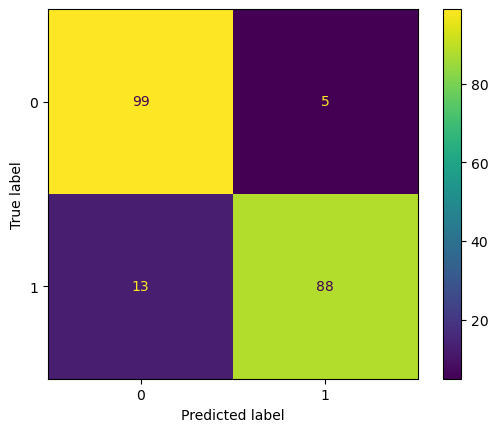

In [8]:
#this graph is just a visualization of what the testing dataset was able to predict accurately using the model we coded
cm=confusion_matrix(y_test,prediction)
cm_display=ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot()
plt.show()

# Neural Network Method (Binary Classification)

MLPClassifier was used in the Neural Network for this dataset. It was seen as the best method as this dataset required a binary classification neural network. 

In [9]:
#testing data (features, explanation)
X= np.array(df.drop(['target'],axis=1))
y= np.array(df['target'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=456)

The alpha in the MLPClassifier is the L2 regularization which prevents the model from overfitting. The activation function is set to sigmoid to produce the probability of getting the disease. The optimization function used is the 'adam' which optimizes the weights of the neural networks with the help of SGD. The early stop is set to stop the training data after the validation stops improving.

In [10]:
#training the data
nn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('neural_network', MLPClassifier(alpha=0.0005, hidden_layer_sizes=(100, 50), activation='logistic', solver='adam',early_stopping=True,  random_state=456))
])
#the accuracy score 
nn_pipeline.fit(X_train,y_train).score(X_test,y_test)

0.8292682926829268

Because this accuracy is smaller it leads me to think this dataset might have a more simplier relationship between the features and the explanatory variable. The more complex algorithm performed with less accuracy than SVM.

In [11]:
#seeing the classification report verifies that this model is less accurate in predicting heart disease in patients.
prediction=nn_pipeline.predict(X_test)
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.90      0.74      0.81       102
           1       0.78      0.92      0.84       103

    accuracy                           0.83       205
   macro avg       0.84      0.83      0.83       205
weighted avg       0.84      0.83      0.83       205



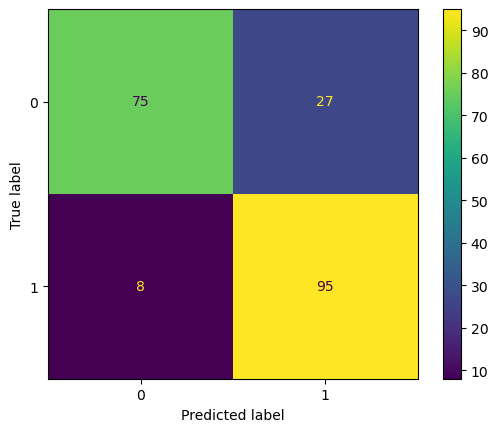

In [12]:
#a visual of the accurate predictions the model was able to represent.
cm=confusion_matrix(y_test,prediction)
cm_display=ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot()
plt.show()